<h1><center>Tutorial 3</h1>

<h2><center>Task 1</h2>

<p>This is the program to simulate the Fisher-Wright model of evolution, as given.</p>

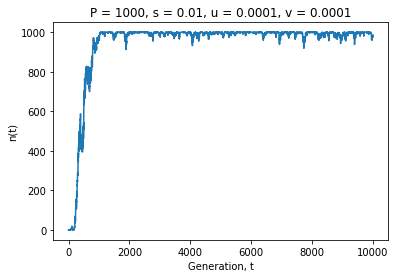

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from functools import partial

rng = np.random.default_rng()

def psm(n, P, s, u, v):
    """We heavily reuse this"""
    ps = (1+s)*n/(P+n*s)
    return (1-v)*ps + u*(1-ps)

def updateFW(n, P, s, u, v):
    """Generate a new population of size P starting with n individuals of type B"""
    return rng.binomial(P, psm(n, P, s, u, v))

class FisherWright():
    """Simulate the Dynamics of the Fisher-Wright Model
    We create an iterator to this"""
    
    def __init__(self, param):
        "create a function with the parameter set apart form n"
        self.update = partial(updateFW, **param)
        
    def __iter__(self):
        n = self.n0
        yield n
        while True:
            n = self.update(n)
            yield n

    def __call__(self, n0):
        """initiate n0 and return iterator"""
        self.n0 = n0
        return iter(self)

param = {"P": 1000, "s": 0.01, "u": 0.0001, "v": 0.0001}

fisherWright = FisherWright(param)

T = 10000

def evolution(model, n0, T, transform=lambda x: x):
    """Run the model for T generations starting from n0
        transform the output of the model with default of doing nothing"""
    it = model(n0)                # create a new iterator
    return [(i, transform(next(it))) for i in range(T)]


evo = evolution(fisherWright, 0, T)

def dict_to_str(dic):
    return ", ".join([f"{key} = {value}" for (key,value) in param.items()])

plt.plot(*zip(*evo))        # weird trick to get matplotlib to plot a list of (x,y) pairs
plt.xlabel("Generation, t")
plt.ylabel("n(t)")
plt.title(dict_to_str(param))
plt.show()

<h3>Questions</h3>

1. Under what conditions does trait $B$ take over the population

Trait $B$ is fitter, so it should take over the population unless $v > s$ and $v \ge u$ (v being significantly bigger). <br>
Seeds contain mutation $B\rightarrow A$ with probability $v, for $B  to takeover it would require $v$ to be low enough to be overcome by the selection strength. <br>
If the mutation $A\rightarrow B$ where the probability is $u$, is bigger than $v$, then takeover can occur even with small selection dominance. 
Takeover can occur at even small advantages in mutation rate.


2. Define the take-over time as the first time when $n(t) = 0.95 P$
    - Plot a graph of how the take-over time depends on the selection strength $s$ (assume $P=10000$ and $u=v=0.0001$)
    - Plot a graph of how the take-over time depends on the mutation rate $u=v=m$ (assuming $P=10000$ and $s=0.01$)
    - Plot a graph of how the take-over time depends on the population size $P$ (assuming $s=0.01$ and $u=v=0.0001$)

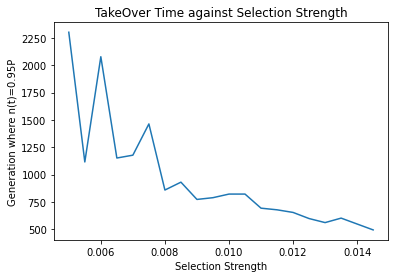

In [2]:
P = 10000
v=u=0.0001

take_over = 0.95 * P

take_over_times = []
for s in np.arange(0.005,0.015,0.0005):
  param = {"P": P, "s": s, "u": u, "v": v}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, 0, T)

  for i in evo:
    if i[1] >= take_over:
      take_over_times.append(i[0])
      break

plt.plot(np.arange(0.005,0.015,0.0005), take_over_times)
plt.xlabel("Selection Strength")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("TakeOver Time against Selection Strength")
plt.show()

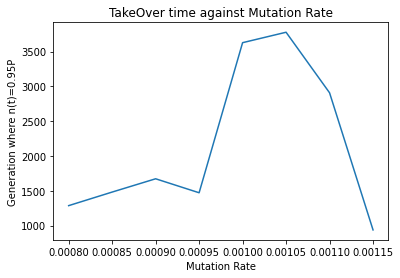

In [3]:
P = 10000
s=0.01

take_over = 0.95 * P

take_over_times = []
for m in np.arange(0.0008,0.0012,0.00005):
  param = {"P": P, "s": s, "u": m, "v": m}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, 0, T)

  for i in evo:
    if i[1] >= take_over:
      take_over_times.append(i[0])
      break

plt.plot(np.arange(0.0008,0.0012,0.00005), take_over_times)
plt.xlabel("Mutation Rate")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("TakeOver time against Mutation Rate")
plt.show()

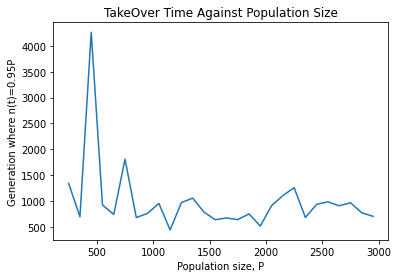

In [4]:
u=v=0.0001
s=0.01

take_over_times = []
for P in np.arange(250,3000,100):
  param = {"P": P, "s": s, "u": u, "v": v}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, 0, T)

  for i in evo:
    if i[1] >= 0.95 * P:
      take_over_times.append(i[0])
      break

plt.plot(np.arange(250,3000,100), take_over_times)
plt.xlabel("Population size, P")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("TakeOver Time Against Population Size")
plt.show()

<h2><center>Task 2</h2>

<p>The results from the previous question will vary from run to run.  To get a better understanding we can average over many runs.  Write a program to do this.</p>

<h4>Takeover Time Against Selection Strength</h4>

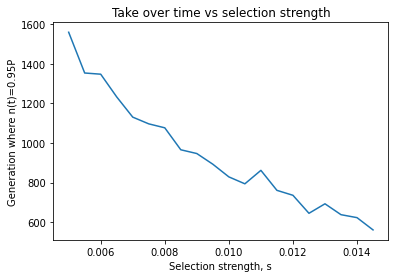

In [5]:
P = 10000
v=u=0.0001
no_runs = 10

take_over = 0.95 * P

take_over_times = []
for s in np.arange(0.005,0.015,0.0005):
  param = {"P": P, "s": s, "u": u, "v": v}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

  for i in evo:
    if i[1] >= take_over:
      take_over_times.append(i[0])
      break
    
plt.plot(np.arange(0.005,0.015,0.0005), take_over_times)
plt.xlabel("Selection strength, s")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("Take over time vs selection strength")
plt.show()

<h4>Takeover Time Against Mutation Rate</h4>

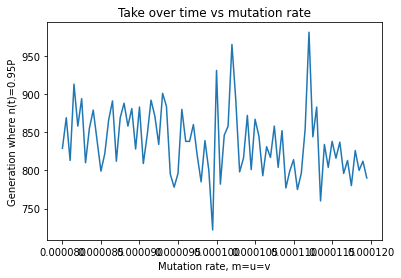

In [6]:
P = 10000
s=0.01

take_over = 0.95 * P
no_runs=10
take_over_times = []
for m in np.arange(0.00008,0.00012,0.0000005):
  param = {"P": P, "s": s, "u": m, "v": m}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

  for i in evo:
    if i[1] >= take_over:
      take_over_times.append(i[0])
      break
    
plt.plot(np.arange(0.00008,0.00012,0.0000005), take_over_times)
plt.xlabel("Mutation rate, m=u=v")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("Take over time vs mutation rate")
plt.show()

<h4>Takeover Time Against Population size</h4>

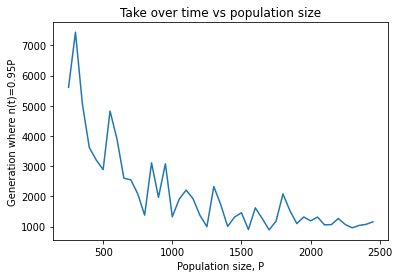

In [7]:
u=v=0.0001
s=0.01
no_runs=10
take_over_times = []
for P in np.arange(250,2500,50):
  param = {"P": P, "s": s, "u": u, "v": v}

  fisherWright = FisherWright(param)

  T = 100000

  evo = evolution(fisherWright, np.zeros(no_runs), T,np.mean)

  for i in evo:
    if i[1] >= 0.95 * P:
      take_over_times.append(i[0])
      break
    
plt.plot(np.arange(250,2500,50), take_over_times)
plt.xlabel("Population size, P")
plt.ylabel("Generation where n(t)=0.95P")
plt.title("Take over time vs population size")
plt.show()

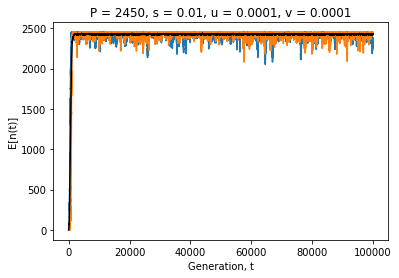

In [8]:
# average over 100 copies
no_runs = 100
multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

# Two single runs
evo1 = evolution(fisherWright, 0, T)
evo2 = evolution(fisherWright, 0, T)

plt.plot(*zip(*evo1), *zip(*evo2), *zip(*multievo), "-k")
plt.xlabel("Generation, t")
plt.ylabel("E[n(t)]")
plt.title(dict_to_str(param))
plt.show()

<h2><center>Task 3</h2>

Write a matrix to compute $\mathbf{W}$ for a population of size $P$ a selection strength $s$, and mutation rates $u$ and $v$.

In [9]:
from scipy.stats import binom
import math

def transition_matrix(P, s, u, v):
    n = np.arange(0,P+1)
    p = psm(n,P,s,u,v)
    return np.array([binom.pmf(nn, P, p) for nn in n])

W = transition_matrix(**param)

C:\Users\natur\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [10]:
W

array([[0.78269495, 0.28504298, 0.10376498, ..., 0.        , 0.        ,
        0.        ],
       [0.19177944, 0.35785346, 0.23520145, ..., 0.        , 0.        ,
        0.        ],
       [0.02348574, 0.22453953, 0.26645378, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.26761204, 0.22184522,
        0.02348574],
       [0.        , 0.        , 0.        , ..., 0.24044951, 0.3592567 ,
        0.19177944],
       [0.        , 0.        , 0.        , ..., 0.10797789, 0.29077186,
        0.78269495]])

1. Show that columns all sum to 1 (A population with $n$ individuals of type $B$ will evolve to a population of $n'$ individuals of type $B$ for some $n'$)
- Check for different parameters

In [11]:
# Sum in axis 0 to sum columns. If all equal 1 then the sum of this vector should be equal to the number of columns.
# We have P + 1 columns, so this should be equal to P + 1.
# These values will not be exactly 1.
equals_one = lambda P, s, u, v : round(transition_matrix(P, s, u, v).sum(axis=0).sum(),5) == P + 1

print("Columns sum to 1?")
print(equals_one(**param))
print(equals_one(P=500, s=0.02, u= 0.001, v=0.001))
print(equals_one(P=500, s=0.03, u= 0.001, v=0.001))
print(equals_one(P=500, s=0.03, u= 0.003, v=0.001))
print(equals_one(P=500, s=0.03, u= 0.003, v=0.005))

Columns sum to 1?
True
True
True
True
True


2. Starting from $p(t,0)=1$ compute the evolution of $\mathbf{p}(t)$ and show a graph of the mean number of individuals.  Compare this to multiEvolution.
- Show that as we use more copies in multiEvolution we get closer to the Markov result

More copies in multiEvolution we get very close to the Markov result.

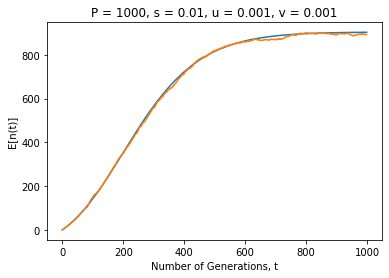

In [12]:
class MarkovChain():
    """Markov Chain Model for simulating the Fisher Wright Model"""
    
    def __init__(self, P, s, u, v):
        self.W = transition_matrix(P, s, u, v)
        self.n = range(P+1)
        self.P = P
        
    def __iter__(self):
        p = np.array(self.p0)
        yield p
        while True:
            p = self.W@p
            yield p
            
    def mean(self, p):
        return self.n@p
    
    def __call__(self, n):
        self.p0 = np.zeros(self.P+1)
        self.p0[n] = 1
        return iter(self)

T = 1000

param = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001} # Speed up mutation

fisherWright = FisherWright(param)


markovChain = MarkovChain(**param)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

plt.plot(*zip(*evoMarkov), *zip(*multievo))
plt.xlabel("Number of Generations, t")
plt.ylabel("E[n(t)]")
plt.title(dict_to_str(param))
plt.show()

<h4> Recall, multievolution </h4>

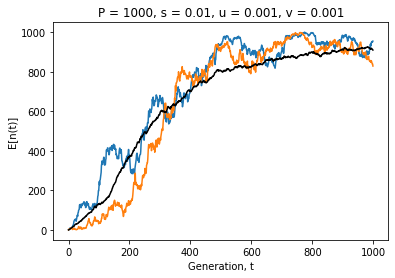

In [13]:
# average over 100 copies
no_runs = 20
multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

# Two single runs
evo1 = evolution(fisherWright, 0, T)
evo2 = evolution(fisherWright, 0, T)

plt.plot(*zip(*evo1), *zip(*evo2), *zip(*multievo), "-k")
plt.xlabel("Generation, t")
plt.ylabel("E[n(t)]")
plt.title(dict_to_str(param))
plt.show()

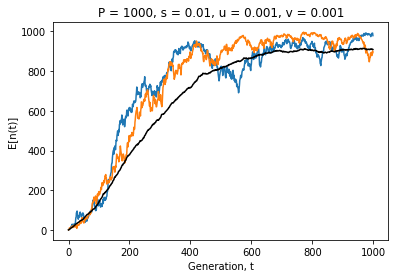

In [14]:
# average over 100 copies
no_runs = 80
multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

# Two single runs
evo1 = evolution(fisherWright, 0, T)
evo2 = evolution(fisherWright, 0, T)

plt.plot(*zip(*evo1), *zip(*evo2), *zip(*multievo), "-k")
plt.xlabel("Generation, t")
plt.ylabel("E[n(t)]")
plt.title(dict_to_str(param))
plt.show()

It is starting to become apparen, that the Markov result is showing the true trend here.

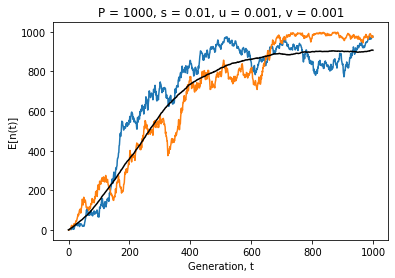

In [15]:
# average over 100 copies
no_runs = 320
multievo = evolution(fisherWright, np.zeros(no_runs), T, np.mean)

# Two single runs
evo1 = evolution(fisherWright, 0, T)
evo2 = evolution(fisherWright, 0, T)

plt.plot(*zip(*evo1), *zip(*evo2), *zip(*multievo), "-k")
plt.xlabel("Generation, t")
plt.ylabel("E[n(t)]")
plt.title(dict_to_str(param))
plt.show()

3. Plot $\mathbf{p}(100)$ and compare this with a histogram from multiEvolution.
- Show that this is true for both short and long times.

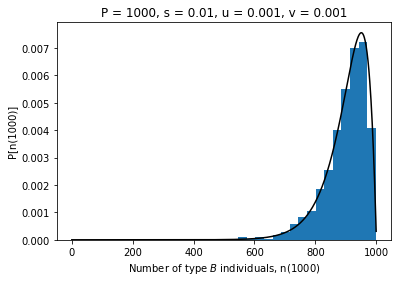

In [16]:
def distribution(model, n0, T):
    it = model(n0)
    for _ in range(T-1):
        next(it)
    dist = next(it)
    return list(range(len(dist))), dist


# Use MarkovChain model
n, markovDist = distribution(markovChain, 0, T)

# Simulate 1000 runs
no_copies = 1000
_, multiDist = distribution(fisherWright, np.zeros(no_copies), T)

plt.hist(multiDist, 20, density=True)
plt.plot(n, markovDist, "k")
plt.xlabel(f"Number of type $B$ individuals, n({T})")
plt.ylabel(f"P[n({T})]")
plt.title(dict_to_str(param))
plt.show()

The black line represents the Markov model results.
It is clearly visible how close the Markov model results allign with the multievolution Fisher-Wright model.

For short times - $T = 500$ is taken

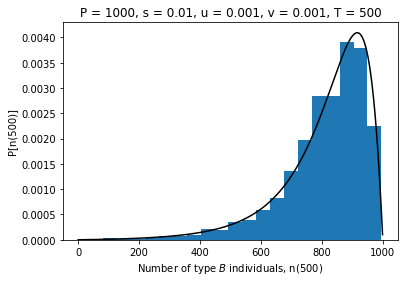

In [17]:
def distribution(model, n0, T):
    """Return the distribution of the Population After T iterations starting from n0"""
    it = model(n0)
    for _ in range(T-1):
        next(it)
    dist = next(it)
    return list(range(len(dist))), dist

T = 500

# Use MarkovChain model
n, markovDist = distribution(markovChain, 0, T)

# Simulate 1000 runs
no_copies = 1000
_, multiDist = distribution(fisherWright, np.zeros(no_copies), T)

plt.hist(multiDist, 20, density=True)
plt.plot(n, markovDist, "k")
plt.xlabel(f"Number of type $B$ individuals, n({T})")
plt.ylabel(f"P[n({T})]")
plt.title(f"{dict_to_str(param)}, T = 500")
plt.show()

For long times - $T = 3000$ is taken

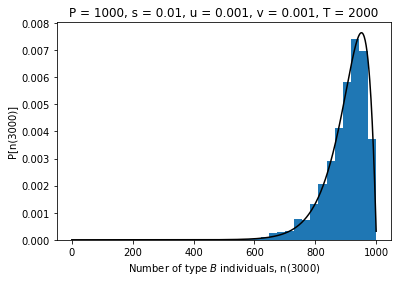

In [18]:
def distribution(model, n0, T):
    """Return the distribution of the Population After T iterations starting from n0"""
    it = model(n0)
    for _ in range(T-1):
        next(it)
    dist = next(it)
    return list(range(len(dist))), dist

T = 3000

# Use markovChain model
n, markovDist = distribution(markovChain, 0, T)

# Simulate 1000 runs
no_copies = 1000
_, multiDist = distribution(fisherWright, np.zeros(no_copies), T)

plt.hist(multiDist, 20, density=True)
plt.plot(n, markovDist, "k")
plt.xlabel(f"Number of type $B$ individuals, n({T})")
plt.ylabel(f"P[n({T})]")
plt.title(f"{dict_to_str(param)}, T = 2000")
plt.show()

<p>The Markov model results exhibits a general trend of the multievolution. This hold for both long and short times.</p>

<h2><center>Task 4</h2>

1. Write code to compute the steady state distribution and compare it to a Markov Chain model run for sufficiently long time

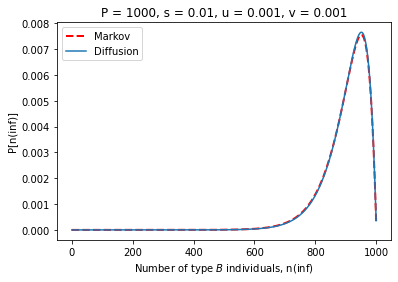

In [19]:
## Diffusion Approximation

class steadyStateDiffusion():
    """ Computes the diffusion approximation to the steady state"""
    
    def __init__(self, P, s, u, v):
        self.param = [P,s,u,v]
        self.P = P
        self.norm = 1
        self.norm, _ = scipy.integrate.quad(self.__call__, 0, P)
        self.norm *= 1

    def psm(self, x):
        _, s, u, v = self.param
        ps = (1+s)*x/(1+s*x)
        return ps*(1-v) + u*(1-ps)

    def integrand(self, x):
        p = self.psm(x)
        a = p-x
        bs = p*(1-p)/self.P
        return -2*a/bs

    def __call__(self, n):
        x = n/self.P
        p = self.psm(x)
        bs = p*(1-p)/self.P
        integral, _ = scipy.integrate.quad(self.integrand,x,0.5)
        return math.exp(integral)/(self.norm*bs)

param = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001} # Speed up mutation

diffusion = steadyStateDiffusion(**param)

## Markov Solution after a long time
T= 1000
n, markovDist = distribution(markovChain, 0, T)

#fig = plt.figure(figsize=(12,8))
plt.plot(n, markovDist, "--r", linewidth=2, label="Markov")

diffResult = [diffusion(i) for i in n]

plt.plot(n, diffResult, label="Diffusion")

plt.xlabel("Number of type $B$ individuals, n(inf)")
plt.ylabel("P[n(inf)]")
plt.title(dict_to_str(param))
plt.legend()
plt.show()

The graph above shows an almost complete overlap between the results obtained from a Markov model chain (for $T=1000$) and the steady state distribution.

The overlap between the results occurs because the Markov chain procedure is completed with time long enough for it to approach the steady state.
Although the results are near identical, the Markov chain approach would become too slow at increasing population sizes.

**Question**
1. Write a program to generate the distribution and compare to Markov model

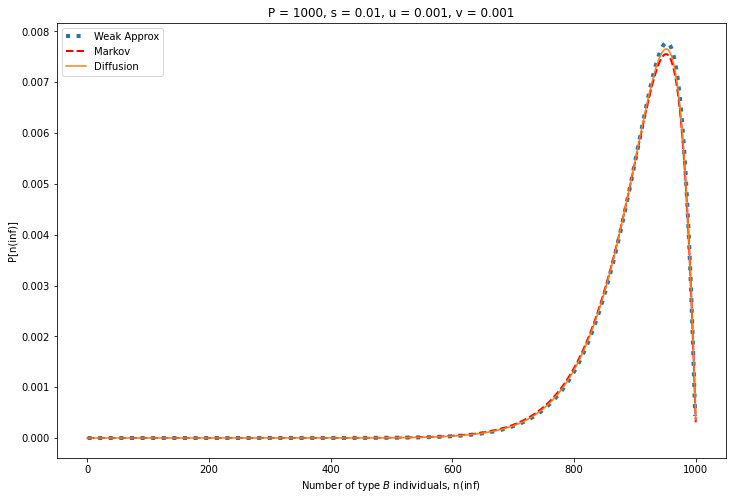

In [20]:
class steadyStateWeakApprox():
    """Computes the steady state using the approximation of weak mutation and selection"""
    
    def __init__(self, P, s, u, v):
        self.abc = 2*P*np.array([u, v, s])
        self.P = P
        a, b, c = self.abc
        self.norm = -math.log(P) - scipy.special.betaln(a,b) - math.log(scipy.special.hyp1f1(a, a+b, c))
        
    def __call__(self, n):
        x = n/self.P
        a, b, c = self.abc
        return np.exp((a-1)*np.log(x) + (b-1)*np.log(1-x) + c*x + self.norm)



fig = plt.figure(figsize=(12,8))  # Make the graph bigger

# Compute distribution using the weak selection/mutation approximation
weakApprox = steadyStateWeakApprox(**param)
nouter = np.array(n[1:-1])    # ignore x=0 and x=1 as logarithms don't like this
plt.plot(nouter, weakApprox(nouter), ":", linewidth=4, label="Weak Approx")


# Plot Markov result
plt.plot(n, markovDist, "r--", linewidth=2, label="Markov")

# Plot the diffusion approximation result
plt.plot(n, diffResult, label="Diffusion")

plt.xlabel("Number of type $B$ individuals, n(inf)")
plt.ylabel("P[n(inf)]")
plt.title(dict_to_str(param))
plt.legend()
plt.show()

As with the previous graph, the graph demonstrates very little difference between the solution to the the Markov model results and the Weak Approximation.

2. Show that this is a poor approximation for strong selection of mutation rates.

We can easily compute the steady state for very large systems

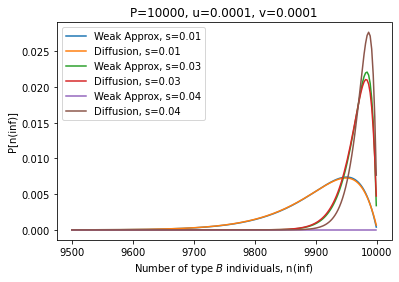

In [21]:
fig, ax = plt.subplots()

params = {"P": 10000, "s": 0.01, "u": 0.0001, "v": 0.0001}
weakApprox = steadyStateWeakApprox(**params)
n = np.linspace(params["P"]-500,params["P"]-1, 200)
ax.plot(n, weakApprox(n), label="Weak Approx, s={}".format(params['s']))

diffusion = steadyStateDiffusion(**params)
diffResult = [diffusion(i) for i in n]
ax.plot(n, diffResult, label="Diffusion, s={}".format(params['s']))

params = {"P": 10000, "s": 0.03, "u": 0.0001, "v": 0.0001}
weakApprox = steadyStateWeakApprox(**params)
n = np.linspace(params["P"]-500,params["P"]-1, 200)
ax.plot(n, weakApprox(n), label="Weak Approx, s={}".format(params['s']))

diffusion = steadyStateDiffusion(**params)
diffResult = [diffusion(i) for i in n]
ax.plot(n, diffResult, label="Diffusion, s={}".format(params['s']))

params = {"P": 10000, "s": 0.04, "u": 0.0001, "v": 0.0001}
weakApprox = steadyStateWeakApprox(**params)
n = np.linspace(params["P"]-500,params["P"]-1, 200)
ax.plot(n, weakApprox(n), label="Weak Approx, s={}".format(params['s']))

diffusion = steadyStateDiffusion(**params)
diffResult = [diffusion(i) for i in n]
ax.plot(n, diffResult, label="Diffusion, s={}".format(params['s']))

ax.set_xlabel("Number of type $B$ individuals, n(inf)")
ax.set_ylabel("P[n(inf)]")
ax.set_title('P={}, u={}, v={}'.format(params['P'], params['u'], params['v']))
ax.legend()

As per the graph above, the Weak Approximation relies on the assumption of weak selection and mutation rates.

The graph compares the Weak Approximation to the solution to the Diffusion equation for increasing strength of selection $s$.

When selection strength increases beyond 0.03, the Weak Approximation is no longer able to model the system. It produces a straight line while the solution to the Diffusion equation produces the correct results.

<h2><center>Task 5</h2>

This is the class provided, that simulates selection, mutation and recombination.

C:\Users\natur\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


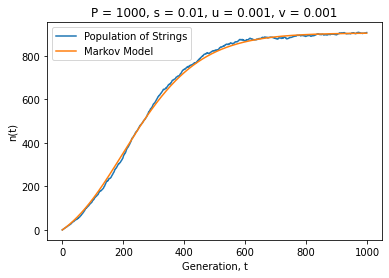

In [22]:
from bisect import bisect

class Population():
    """Container of Population"""
    
    def __init__(self, P, L):
        """create P genomes of length L initialised to 0 string"""
        self.pop = np.zeros((P,L), dtype=bool)
        self.P = P
        self.L = L
        
    def __getitem__(self, k):
        """return genome of individual k"""
        return self.pop[k,:]
    
    def __len__(self):
        """size of population"""
        return self.P
    
    def no_ones(self):
        """compute the number of 1's in each string"""
        return np.sum(self.pop, axis=1)
    
    def prob(self, s):
        """Compute the probability of seclecting each member"""
        F = self.no_ones()
        F -= max(F)            # prevent overflow
        w = pow(1.0+s, F)
        return w/sum(w)
    
    def choose_parents(self, n, s):
        """Choose n parents according to their fitness"""
        p = self.prob(s)
        cp = np.cumsum(p)
        r = np.random.rand(2*self.P)
        return [bisect(cp, rng.random()) for _ in range(n)]
    
    def crossover(self, m, f):
        """Create a child by choosing each allele from either parent with equal probability"""
        mask = np.random.randint(2,size=self.L)
        imask = 1 - mask
        return mask*self[f] + imask*self[m] 
        
    def recombine(self, s):
        """Generate a new population from 2 P parents selected according to their fitness"""
        n = self.choose_parents(2*self.P, s)
        newPop = Population(self.P, self.L)
        for m,f,c in zip(n[::2], n[1::2], range(self.P)):
            newPop.pop[c,:] = self.crossover(f,m)
        return newPop
    
    def selection(self, s):
        """Generate a new population asexually"""
        n = self.choose_parents(self.P, s)
        newPop = Population(self.P, self.L)
        for c, p in enumerate(n):
            newPop.pop[c,:] = self[p]
        return newPop
        
    def mutate(self, u):
        """Flip spins with probablity u
        It does this by drawing a random deviate representing the expected gap between mutations"""
        PL = self.P*self.L
        c = 1.0/math.log(1.0-u)
        flat = self.pop.view(dtype=bool).reshape(PL)
        s = int(c*math.log(np.random.rand()))
        while s < PL:
            flat[s] = 1-flat[s]
            s += int(c*math.log(np.random.rand()))
            
    def mutants_per_site(self):
        """We are interested in the frequency of mutations at each Site"""
        return np.sum(self.pop, axis=0)

    def __str__(self):
        """Create a nice sting showing the population of their fitness"""
        F = self.no_ones()
        s = ""
        for k in range(self.P):
            s += f"{k}: {1*self[k]} F={F[k]}\n"
        return s

class PopulationEvol():
    """Iterate Class to Evolve a Population"""
    
    def __init__(self, L, P, s, u):
        self.L = L
        self.P = P
        self.s = s
        self.u = u
        
    def __iter__(self):
        pop = Population(self.P, self.L)
        yield pop
        while True:
            pop = pop.recombine(self.s)
            pop.mutate(self.u)
            yield pop
            
    def __call__(self, dummy):
        return iter(self)
    
def meanFitness(pop):
    """Returns the mean number of mutations in the population"""
    return np.mean(pop.mutants_per_site())

# Run a Population of strings
paramGA = {"L": 100, "P": 1000, "s": 0.01, "u": 0.001}
modelGA = PopulationEvol(**paramGA)
T = 1000
evoGA = evolution(modelGA, None, T, meanFitness)

# Compare with Marov Model
param = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001}
markovChain = MarkovChain(**param)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

plt.plot(*zip(*evoGA), label="Population of Strings")
plt.plot(*zip(*evoMarkov), label="Markov Model")
plt.xlabel("Generation, t")
plt.ylabel("n(t)")
plt.title(dict_to_str(paramGA))
plt.legend()
plt.show()

The Population of Strings and the Markov Model are compared in the graph above.

Although the Population of Strings differs slightly from the Markov Model, the same general trend is clearly seen.
Population of Strings is a good approximation of the Markov model results.

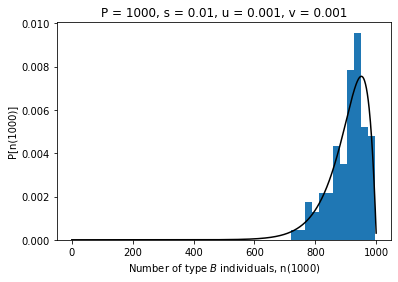

In [23]:
# Distribution in Population

n, markovDist = distribution(markovChain, 0, T)
modelGA = PopulationEvol(**paramGA)
_, gaDist = distribution(modelGA, 0, T)

plt.hist(gaDist.mutants_per_site(), 12, density=True)
plt.plot(n, markovDist, "k")
plt.xlabel(f"Number of type $B$ individuals, n({T})")
plt.ylabel(f"P[n({T})]")
plt.title(dict_to_str(paramGA))
plt.show()

The black line represents the Markov model results.
The figure above shows a histogram of mean number of mutant trains across sites.
The yielded results are very similar.

**Question**
1. Write a program to simulate sexual evolution of the population
    - Compare the mean number of mutant traits at each site with the Markov chain model
    - Compare the distribution of mutant traits across the differ sites with that for a Markov chain

C:\Users\natur\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


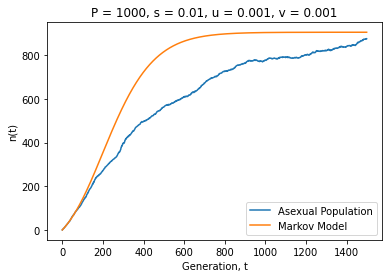

In [24]:
class PopulationAsexualEvol():
    """Iterate Class to Evolve a Population"""
    
    def __init__(self, L, P, s, u):
        self.L = L
        self.P = P
        self.s = s
        self.u = u
        
    def __iter__(self):
        pop = Population(self.P, self.L)
        yield pop
        while True:
            pop = pop.selection(self.s)
            pop.mutate(self.u)
            yield pop
            
    def __call__(self, dummy):
        return iter(self)

# Run a Population of strings
paramGA = {"L": 100, "P": 1000, "s": 0.01, "u": 0.001}
modelGAa = PopulationAsexualEvol(**paramGA)
T = 1500
evoGAa = evolution(modelGAa, None, T, meanFitness)

# Compare with Markov Model
param = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001}
markovChain = MarkovChain(**param)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

plt.plot(*zip(*evoGAa), label="Asexual Population")
plt.plot(*zip(*evoMarkov), label="Markov Model")
plt.xlabel("Generation, t")
plt.ylabel("n(t)")
plt.title(dict_to_str(paramGA))
plt.legend()
plt.show()

In the graph above, it is very noticable that the Asexual Population is in fact poorly modeled using the Fisher-Wright model.

Different steady-state values are reached by the Asexual Population.
Complete takeover is not achieved. Instead, the population remains stable at a large portion of trait $B$, approximately $70\%$-$80\%$.

In [25]:
# MultiEvo
params = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001}
n_runs = 20
fw = FisherWright(params)
multievo = evolution(fw, np.zeros(n_runs), T, np.mean)
t, n = zip(*multievo)

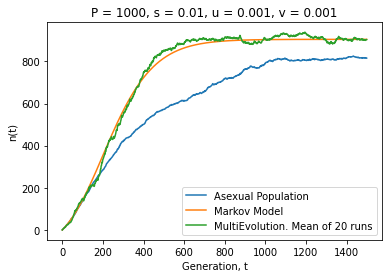

In [26]:
class PopulationAsexualEvol():
    """Iterate Class to Evolve a Population"""
    
    def __init__(self, L, P, s, u):
        self.L = L
        self.P = P
        self.s = s
        self.u = u
        
    def __iter__(self):
        pop = Population(self.P, self.L)
        yield pop
        while True:
            pop = pop.selection(self.s)
            pop.mutate(self.u)
            yield pop
            
    def __call__(self, dummy):
        return iter(self)

# Run a Population of strings
paramGA = {"L": 100, "P": 1000, "s": 0.01, "u": 0.001}
modelGAa = PopulationAsexualEvol(**paramGA)
T = 1500
evoGAa = evolution(modelGAa, None, T, meanFitness)

# Compare with Markov Model
param = {"P": 1000, "s": 0.01, "u": 0.001, "v": 0.001}
markovChain = MarkovChain(**param)
evoMarkov = evolution(markovChain, 0, T, markovChain.mean)

plt.plot(*zip(*evoGAa), label="Asexual Population")
plt.plot(*zip(*evoMarkov), label="Markov Model")
plt.plot(t, n, 
        alpha=1,
        label='MultiEvolution. Mean of {} runs'.format(n_runs)
        ) 
plt.xlabel("Generation, t")
plt.ylabel("n(t)")
plt.title(dict_to_str(paramGA))
plt.legend()
plt.show()

The graph above shows MultiEvolution, Markov Model as well as the Asexual Population model.

Asexual populations experience unpredictable evolutionary behaviour that has currently not been solved. 
We are still unable to properly model such systems. While Sexual Populations are successfully modeled above.